# NEW YORK City Taxi Trip Prediction

In [9]:
import pandas as pd 

In [10]:
df=pd.read_csv(r"E:\Major Projects\NY\data\taxifare.csv")

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [12]:
df.shape

(120000, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [14]:
# Feature Engineering
import datetime

In [15]:
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) - datetime.timedelta(hours=4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [19]:
df['pickup_datetime'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
119995    2010
119996    2010
119997    2010
119998    2010
119999    2010
Name: pickup_datetime, Length: 120000, dtype: int32

In [20]:
df['pickup_datetime'].dt.month

0         4
1         4
2         4
3         4
4         4
         ..
119995    4
119996    4
119997    4
119998    4
119999    4
Name: pickup_datetime, Length: 120000, dtype: int32

In [21]:
df['pickup_datetime'].dt.day

0         19
1         17
2         17
3         11
4         16
          ..
119995    18
119996    23
119997    18
119998    13
119999    17
Name: pickup_datetime, Length: 120000, dtype: int32

In [22]:
df['pickup_datetime'].dt.hour

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Name: pickup_datetime, Length: 120000, dtype: int32

In [23]:
df['pickup_datetime'].dt.minute

0         17
1         43
2         23
3         25
4         19
          ..
119995    33
119996    27
119997    50
119998    14
119999     0
Name: pickup_datetime, Length: 120000, dtype: int32

In [24]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hours'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute

In [25]:
df.shape

(120000, 13)

In [26]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [27]:
import numpy as np

In [28]:
np.where(df['Hours'] < 12, 0, 1)

array([0, 0, 0, ..., 1, 0, 1])

In [29]:
df['morning'] = np.where(df['Hours'] < 12, 0, 1)

In [30]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [31]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [32]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [33]:
df['fare_class'].unique()

array([0, 1], dtype=int64)

In [34]:
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html#:~:text=The%20Haversine%20(or%20great%20circle,the%20data%20must%20be%202
from sklearn.metrics.pairwise import haversine_distances
from math import radians
newdelhi = [28.6139, 77.2090]
bangalore = [12.9716, 77.5946]

In [35]:
newdelhi_in_radians = [radians(_) for _ in newdelhi]
bangalore_in_radians = [radians(_) for _ in bangalore]

In [36]:
result = haversine_distances([newdelhi_in_radians, bangalore_in_radians])

In [37]:
result*6371

array([[   0.       , 1739.8021019],
       [1739.8021019,    0.       ]])

In [38]:
np.radians(df['dropoff_latitude']-df["pickup_latitude"])

0         0.000248
1         0.000062
2         0.000264
3        -0.000144
4         0.000156
            ...   
119995   -0.000834
119996   -0.000564
119997   -0.000733
119998    0.000109
119999   -0.000155
Length: 120000, dtype: float64

## Haversine Distance

In [39]:
###https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points


def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [40]:
df['Total distance']=haversine(df)

In [41]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [42]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [43]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


### Regression Model

In [44]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [45]:
df.to_csv(r"E:\Major Projects\NY\data\final_data.csv")

In [46]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [47]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


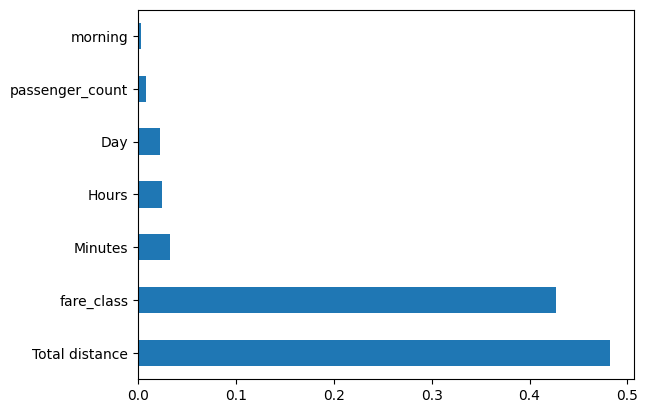

In [48]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [49]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [50]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [52]:
import xgboost

In [53]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,feature_types,None


In [54]:
y_pred=regressor.predict(X_test)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
import seaborn as sns

<Axes: xlabel='fare_amount', ylabel='Density'>

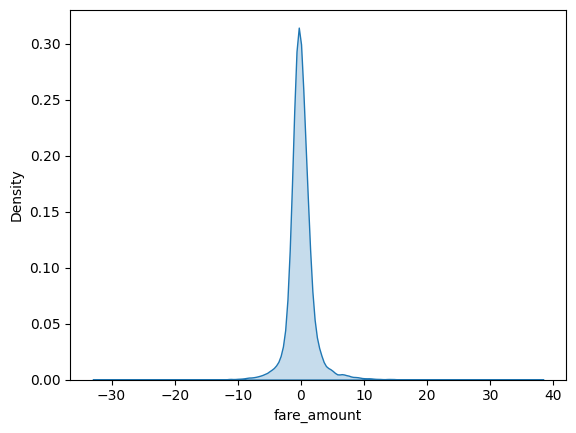

In [57]:
sns.kdeplot(y_test-y_pred, fill=True)

<Axes: xlabel='fare_amount', ylabel='Density'>

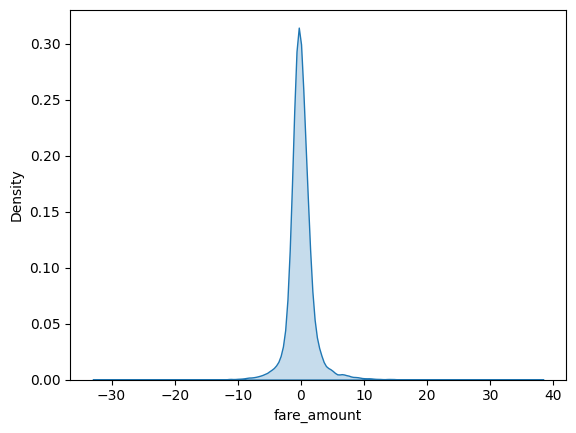

In [58]:
sns.kdeplot(y_test-y_pred, fill=True)

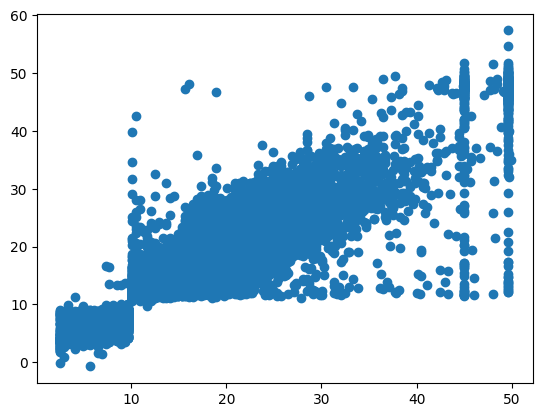

In [59]:
plt.scatter(y_test,y_pred)

In [60]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9400933731258582
MAE: 1.4034546117048792
MSE: 6.6487213748797
RMSE: 2.578511464950214


### Hyper Parameter Training

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [63]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [64]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgboost.XGBRegressor()

In [66]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [67]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,"XGBRegressor(...ate=None, ...)"
,param_distributions,"{'learning_rate': ['0.05', '0.1', ...], 'max_depth': [5, 10, ...], 'min_child_weight': [3, 4, ...], 'n_estimators': [100, 200, ...], ...}"
,n_iter,5
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [69]:
y_pred=xg_random.predict(X_test)

<Axes: xlabel='fare_amount', ylabel='Density'>

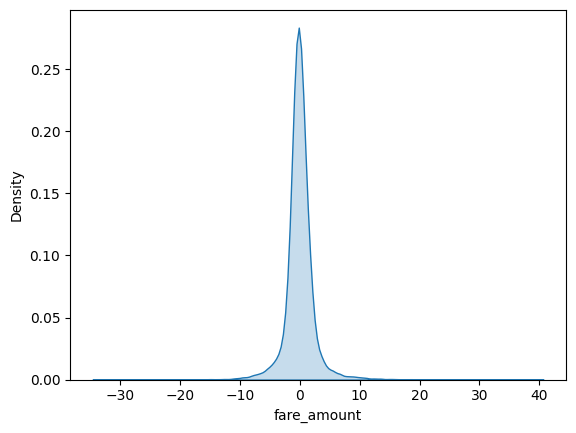

In [70]:
sns.kdeplot(y_test-y_pred, fill=True)

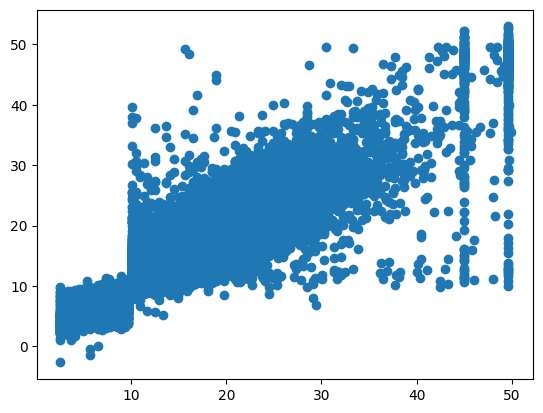

In [71]:
plt.scatter(y_test,y_pred)

In [72]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9259769512002524
MAE: 1.5850074050101803
MSE: 8.155652043274078
RMSE: 2.8558102253605853


### ANN (Regression Problem)

In [73]:
X_train.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
40090,1,1,2010,4,12,16,17,1,3.181725
90425,0,2,2010,4,18,7,39,0,1.528133
63492,0,1,2010,4,11,18,53,1,4.020180
19581,1,1,2010,4,21,20,51,1,6.338458
39057,1,1,2010,4,14,16,46,1,6.823749


In [74]:
y_train.head()

40090    17.7
90425     4.9
63492     8.1
19581    17.7
39057    15.3
Name: fare_amount, dtype: float64

In [75]:
X_train.shape[1]

9

In [76]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
print("Keras:", tf.keras.__version__)

TensorFlow: 2.12.0
Keras: 2.12.0


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU


# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages

In [78]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5628/5628 [==========================

### Model Evaluation

In [79]:
prediction=NN_model.predict(X_test)

1125/1125 [==============================] - 2s 2ms/step


<Axes: ylabel='Density'>

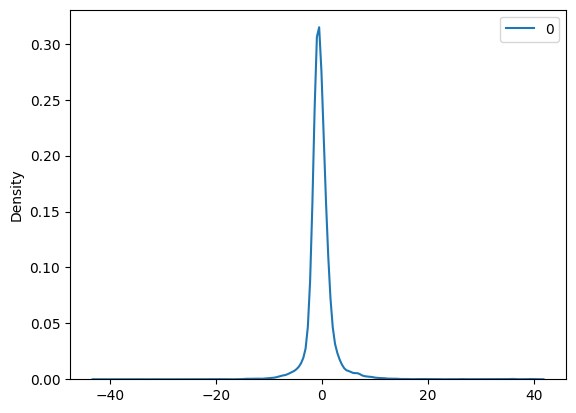

In [80]:
sns.kdeplot(y_test.values.reshape(-1,1)-prediction)

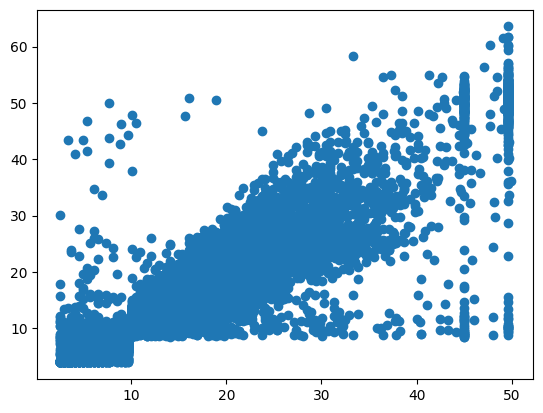

In [81]:
plt.scatter(y_test,prediction)

In [82]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.5425772247637644
MSE: 8.660544401644636
RMSE: 2.942880290063569


In [83]:
print("Best CV R²:", xg_random.best_score_)   # average across folds

Best CV R²: -8.236166043199741


In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = xg_random.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R²: 0.8574333141541146
MAE: 1.5850074050101803
RMSE: 2.8558102253605853


### TPOTRegressor Automated Library 

In [85]:
import sklearn
from sklearn.metrics import get_scorer
from sklearn.metrics._scorer import _SCORERS
sklearn.metrics.SCORERS = _SCORERS

In [86]:
from tpot import TPOTRegressor

e:\anaconda3\envs\tpot-env\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [87]:
import sklearn
import numpy
import tpot
import xgboost

print("sklearn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("tpot:", tpot.__version__)
print("xgboost:", xgboost.__version__)

sklearn: 1.7.2
numpy: 1.23.5
tpot: 0.12.2
xgboost: 1.7.6


In [88]:
from tpot import TPOTRegressor

custom_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2']
    },
    'sklearn.linear_model.Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    }
}

tpot = TPOTRegressor(
    generations=2,
    population_size=5,
    cv=3,
    config_dict=custom_config,
    verbosity=2,
    random_state=42,
    n_jobs=1
)

tpot.fit(X_train, y_train)

is_classifier
is_regressor
is_classifier
is_regressor


e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1206: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1246: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


                                                                            
Generation 1 - Current best internal CV score: -7.034336370205555
                                                                            
Generation 2 - Current best internal CV score: -6.998602245852539
                                                                            
Best pipeline: RandomForestRegressor(Ridge(input_matrix, alpha=0.1), max_features=log2, n_estimators=100)


,generations,2
,population_size,5
,offspring_size,None
,mutation_rate,0.9
,crossover_rate,0.1
,scoring,None
,cv,3
,subsample,1.0
,n_jobs,1
,max_time_mins,None
,max_eval_time_mins,5


In [89]:
tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    cv=3,
    config_dict=custom_config,   # ✅ force only safe models
    verbosity=2,
    random_state=42,
    n_jobs=1
)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

print("✅ All models imported successfully!")

✅ All models imported successfully!


In [91]:
from tpot import TPOTRegressor

# minimal safe config
custom_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2']
    },
    'sklearn.linear_model.Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    }
}

tpot = TPOTRegressor(
    generations=2,           # keep tiny for test
    population_size=5,
    cv=3,
    config_dict=custom_config,   # 🔑 ONLY our models
    verbosity=2,
    random_state=42,
    n_jobs=1
)

tpot.fit(X_train, y_train)

is_classifier
is_regressor
is_classifier
is_regressor


e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1206: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1246: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


                                                                            
Generation 1 - Current best internal CV score: -7.034336370205555
                                                                            
Generation 2 - Current best internal CV score: -6.998602245852539
                                                                            
Best pipeline: RandomForestRegressor(Ridge(input_matrix, alpha=0.1), max_features=log2, n_estimators=100)


,generations,2
,population_size,5
,offspring_size,None
,mutation_rate,0.9
,crossover_rate,0.1
,scoring,None
,cv,3
,subsample,1.0
,n_jobs,1
,max_time_mins,None
,max_eval_time_mins,5


In [92]:
from tpot import TPOTRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# custom safe config
custom_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2']
    },
    'xgboost.XGBRegressor': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    },
    'sklearn.linear_model.Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'sklearn.linear_model.ElasticNet': {
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    'sklearn.neighbors.KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# initialize TPOT with only our config
tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    cv=3,
    config_dict=custom_config,  # ✅ force custom
    verbosity=2,
    random_state=42,
    n_jobs=1
)

# fit
tpot.fit(X_train, y_train)

# evaluate
y_pred = tpot.predict(X_test)
print("Best pipeline:", tpot.fitted_pipeline_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1206: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1246: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor


Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


                                                                               
Generation 1 - Current best internal CV score: -6.686871332280414
                                                                             
Generation 2 - Current best internal CV score: -6.686871332280414
                                                                             
Generation 3 - Current best internal CV score: -6.686871332280414
                                                                              
Generation 4 - Current best internal CV score: -6.680508413551848
                                                                              
Generation 5 - Current best internal CV score: -6.680508413551848
                                                                              
Best pipeline: XGBRegressor(Ridge(input_matrix, alpha=1.0), learning_rate=0.1, max_depth=5, n_estimators=100)
Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator

e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [96]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.fitted_pipeline_.score(X_test, y_test))
tpot.export('tpot_taxiFaredocumentation_pipeline.py')

'''import joblib

tpot = TPOTRegressor(generations=1, population_size=10, verbose=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.fitted_pipeline_.score(X_test, y_test))

# Save the trained model to a file
joblib.dump(tpot.fitted_pipeline_, 'tpot_taxi_fare_pipeline.pkl')'''

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1206: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\base.py:1246: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


                                                                            
Generation 1 - Current best internal CV score: -6.706951184836906
                                                                            
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)
0.8850073638306731


"import joblib\n\ntpot = TPOTRegressor(generations=1, population_size=10, verbose=2, random_state=42)\ntpot.fit(X_train, y_train)\n\nprint(tpot.fitted_pipeline_.score(X_test, y_test))\n\n# Save the trained model to a file\njoblib.dump(tpot.fitted_pipeline_, 'tpot_taxi_fare_pipeline.pkl')"

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8860019881944144
MAE: 1.3947695027512976
MSE: 6.521356040473876
RMSE: 2.5536945863736085


In [98]:
import numpy as np
if not hasattr(np, "float"):
    np.float = float
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
#from tpot.builtins import StackingEstimator
#from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv(r"E:\Major Projects\NY\data\final_data.csv", sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=42)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3868\2086258925.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, "float"):


In [99]:
# Average CV score on the training set was: -6.6694533560074545
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.45, tol=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\tpot-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [100]:
results

array([ 4.45318563,  7.24627163,  6.64175583, ...,  7.25530353,
       13.1392953 ,  7.11247282])

In [101]:
training_target

84145      9.7
60838     16.5
99429      4.9
26258     10.5
12165     15.7
          ... 
110268     8.9
119879     4.1
103694    14.1
860        6.1
15795      4.9
Name: fare_amount, Length: 90000, dtype: float64

<Axes: ylabel='Density'>

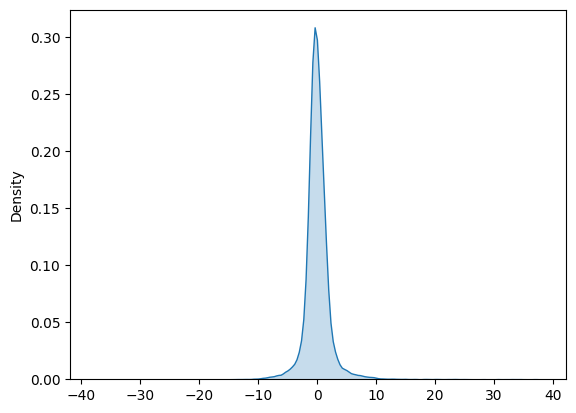

In [102]:
sns.kdeplot(testing_target.values-results, fill=True)

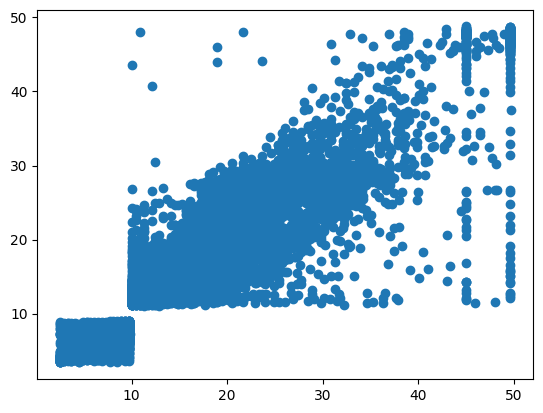

In [103]:
import matplotlib.pyplot as plt
plt.scatter(testing_target,results)

In [104]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(testing_target, results))
print('MSE:', metrics.mean_squared_error(testing_target, results))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testing_target, results)))

MAE: 1.4024733378171717
MSE: 6.307831130788921
RMSE: 2.511539593713171


## Classification Model

In [105]:
df=pd.read_csv(r'E:\Major Projects\NY\data\final_data.csv',index_col=False)
df.head()

,Unnamed: 0,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [106]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=df.iloc[:,1]

In [107]:
X

,Unnamed: 0,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,0,0,1,2010,4,19,4,17,0
1,1,0,1,2010,4,17,11,43,0
2,2,1,2,2010,4,17,7,23,0
3,3,0,1,2010,4,11,17,25,1
4,4,1,1,2010,4,16,22,19,1
...,...,...,...,...,...,...,...,...,...
119995,119995,1,1,2010,4,18,10,33,0
119996,119996,1,1,2010,4,23,6,27,0
119997,119997,1,3,2010,4,18,14,50,1
119998,119998,0,1,2010,4,13,4,14,0


In [108]:
y

0          6.5
1          6.9
2         10.1
3          8.9
4         19.7
          ... 
119995    15.3
119996    15.3
119997    12.5
119998     4.9
119999     5.3
Name: fare_amount, Length: 120000, dtype: float64

In [109]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


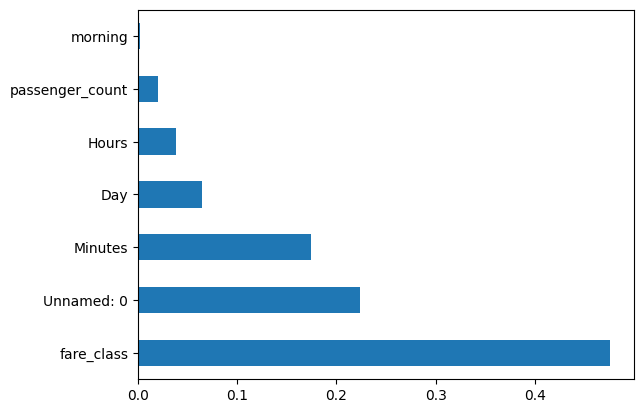

In [110]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [111]:
X.head()

,Unnamed: 0,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,0,0,1,2010,4,19,4,17,0
1,1,0,1,2010,4,17,11,43,0
2,2,1,2,2010,4,17,7,23,0
3,3,0,1,2010,4,11,17,25,1
4,4,1,1,2010,4,16,22,19,1


In [112]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [113]:
y.value_counts()

fare_amount
5.30     6283
4.90     6202
5.70     6131
6.10     5902
6.50     5861
         ... 
17.60       1
46.80       1
7.50        1
5.00        1
31.79       1
Name: count, Length: 414, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Step 1: Define bins (adjust as per your data distribution)
bins = [0, 10, 20, 50, 100, np.inf]   # fare ranges
labels = [0, 1, 2, 3, 4]              # class labels

# Step 2: Convert continuous target into categorical classes
y_train_class = np.digitize(y_train, bins) - 1
y_test_class = np.digitize(y_test, bins) - 1

# Step 3: Train classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train_class)

# Step 4: Predictions
y_pred_class = classifier.predict(X_test)

# Step 5: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Confusion Matrix:
 [[24023     0     0]
 [    0  8607   508]
 [    0  2649   213]]
Accuracy: 0.9123055555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24023
           1       0.76      0.94      0.85      9115
           2       0.30      0.07      0.12      2862

    accuracy                           0.91     36000
   macro avg       0.69      0.67      0.65     36000
weighted avg       0.88      0.91      0.89     36000



In [122]:
y_pred=classifier.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# ⚠️ Use y_test_class and y_pred_class (NOT y_test, y_pred)
cm = confusion_matrix(y_test_class, y_pred_class)
score = accuracy_score(y_test_class, y_pred_class)

print("Confusion Matrix:\n", cm)
print("Accuracy:", score)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Confusion Matrix:
 [[24023     0     0]
 [    0  8607   508]
 [    0  2649   213]]
Accuracy: 0.9123055555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24023
           1       0.76      0.94      0.85      9115
           2       0.30      0.07      0.12      2862

    accuracy                           0.91     36000
   macro avg       0.69      0.67      0.65     36000
weighted avg       0.88      0.91      0.89     36000



### HyperParameter Training

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [127]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

In [128]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
classifier=RandomForestClassifier()

In [130]:
classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [131]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,scoring='accuracy', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [133]:
#rf_random.fit(X_train,y_train)
rf_random.fit(X_train, y_train_class)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [134]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_depth': 25}

In [135]:
y_pred=rf_random.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test_class, y_pred_class)
score = accuracy_score(y_test_class, y_pred_class)

print("Confusion Matrix:\n", cm)
print("Accuracy:", score)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Confusion Matrix:
 [[24023     0     0]
 [    0  8607   508]
 [    0  2649   213]]
Accuracy: 0.9123055555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24023
           1       0.76      0.94      0.85      9115
           2       0.30      0.07      0.12      2862

    accuracy                           0.91     36000
   macro avg       0.69      0.67      0.65     36000
weighted avg       0.88      0.91      0.89     36000

